In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the necessary libraries
import torch
import pandas as pd
import re
import matplotlib.pyplot as plt


from torch.utils.data import TensorDataset

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification


In [ ]:
#importing the dataset into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Capston/mbti_1.csv')

In [ ]:
#showing the first 5 rows of the dataset
df.head(10)

,types,posts
0,ESFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,ESFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,ESFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [ ]:
#showing dataset infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   types   8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
#showing the posts of the first user in the dataset
df.posts.values[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
#showing the number of users per personality type
df.types.value_counts()

INFP    928
INFJ    919
INTJ    786
ENTP    685
ENFP    675
INTP    595
ISFP    555
ESTP    512
ESTJ    448
ENTJ    430
ESFP    399
ISFJ    387
ISTJ    385
ISTP    337
ENFJ    326
ESFJ    308
Name: types, dtype: int64

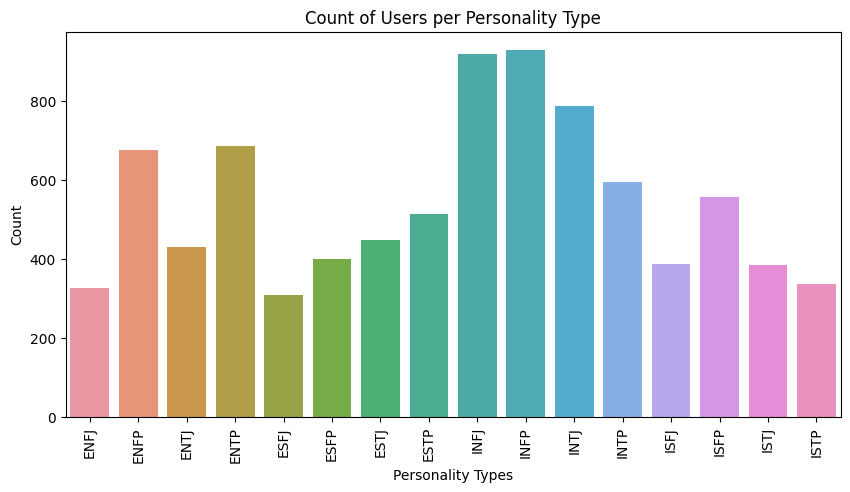

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'types' column contains personality type strings
# You can convert it into a categorical data type in pandas
df['types'] = df['types'].astype('category')

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='types')
plt.xlabel('Personality Types')
plt.ylabel('Count')
plt.title('Count of Users per Personality Type')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [ ]:
#removing URLs and punctuation from dataset
for index in df.index.values:
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
  df.posts.iloc[index] = re.sub(r"http\S+","",df.posts.iloc[index])
  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts.iloc[index])
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('  '))
df.head(10)

"""
saving the clean dataset into a csv file
df.to_csv('mbti_clean_dataset.csv',index=False)
"""

<ipython-input-10-0e08f32183a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
<ipython-input-10-0e08f32183a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.posts.iloc[index] = re.sub(r"http\S+","",df.posts.iloc[index])
<ipython-input-10-0e08f32183a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts

"\nsaving the clean dataset into a csv file\ndf.to_csv('mbti_clean_dataset.csv',index=False)\n"

In [ ]:
#identifying the different classes of users in the dataset
labels = df.types.unique()
labels

['ESFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', ..., 'ISTJ', 'ESTP', 'INFJ', 'ESTJ', 'INFP']
Length: 16
Categories (16, object): ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', ..., 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

In [ ]:
#mapping personality types with their numberical representation
labels2 = []
label_rep = {}
for index,labels in enumerate(labels):
    label_rep[labels] = index
    labels2.append(labels)
labels2

['ESFJ',
 'ENTP',
 'INTP',
 'INTJ',
 'ENTJ',
 'ENFJ',
 'ESFP',
 'ENFP',
 'ISFP',
 'ISTP',
 'ISFJ',
 'ISTJ',
 'ESTP',
 'INFJ',
 'ESTJ',
 'INFP']

In [ ]:
label_rep

{'ESFJ': 0,
 'ENTP': 1,
 'INTP': 2,
 'INTJ': 3,
 'ENTJ': 4,
 'ENFJ': 5,
 'ESFP': 6,
 'ENFP': 7,
 'ISFP': 8,
 'ISTP': 9,
 'ISFJ': 10,
 'ISTJ': 11,
 'ESTP': 12,
 'INFJ': 13,
 'ESTJ': 14,
 'INFP': 15}

In [ ]:
#replacing each personality type with its numerical representation
df['label'] = df.types.replace(label_rep)
df.head(10)

,types,posts,label
0,ESFJ,' enfp and intj moments sportscenter not top ...,0
1,ENTP,'I'm finding the lack of me in these posts ver...,1
2,INTP,'Good one Of course to which I say I know th...,2
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,3
4,ENTJ,'You're fired That's another silly misconcepti...,4
5,INTJ,' Science is not perfect No scientist claims t...,3
6,ESFJ,'No I can't draw on my own nails haha Those we...,0
7,INTJ,'I tend to build up a collection of things on ...,3
8,ESFJ,I'm not sure that's a good question The distin...,0
9,INTP,' I'm in this position where I have to actuall...,2


In [ ]:
#Splitting the dataset into training (85% of the data) and test (15% of the data) sets
x_train, x_test, y_train, y_test = train_test_split(df.index.values, df.label.values, test_size=0.15, random_state=17, stratify=df.label.values)

In [ ]:
#creating a new column "data_type"
df['data_type'] = ['not_set']*df.shape[0]

In [ ]:
#identifying the rows belonging to both training and test sets
df.loc[x_train,'data_type'] = 'train'
df.loc[x_test,' data_type'] = 'test'

In [ ]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (85% of the data) and test (15% of the data) sets
x_train, x_test, y_train, y_test = train_test_split(df.index.values, df.label.values, test_size=0.15, random_state=17, stratify=df.label.values)

# Creating a new column "data_type"
df['data_type'] = 'not_set'

# Identifying the rows belonging to both training and test sets
df.loc[x_train, 'data_type'] = 'train'
df.loc[x_test, 'data_type'] = 'test'

# Verify the data in 'data_type' column
print(df.head(10))

# Check data for training and test sets
print(df.groupby(['types', 'label', 'data_type']).count())

# Creating a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Encoding the data using your tokenizer with truncation and padding
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type == 'train'].posts.values.tolist(),  # Ensure it's a list
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    return_tensors='pt',
    truncation=True
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type == 'test'].posts.values.tolist(),  # Ensure it's a list
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    return_tensors='pt',
    truncation=True
)


  types                                              posts label data_type  \
0  ESFJ  ' enfp and intj moments  sportscenter not top ...     0     train   
1  ENTP  'I'm finding the lack of me in these posts ver...     1     train   
2  INTP  'Good one   Of course to which I say I know th...     2     train   
3  INTJ  'Dear INTP  I enjoyed our conversation the oth...     3     train   
4  ENTJ  'You're fired That's another silly misconcepti...     4     train   
5  INTJ  ' Science is not perfect No scientist claims t...     3     train   
6  ESFJ  'No I can't draw on my own nails haha Those we...     0     train   
7  INTJ  'I tend to build up a collection of things on ...     3     train   
8  ESFJ  I'm not sure that's a good question The distin...     0      test   
9  INTP  ' I'm in this position where I have to actuall...     2     train   

   data_type  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
6        NaN  
7        NaN  
8     

In [ ]:
df.head(10)

,types,posts,label,data_type,data_type
0,ESFJ,' enfp and intj moments sportscenter not top ...,0,train,NaN
1,ENTP,'I'm finding the lack of me in these posts ver...,1,train,NaN
2,INTP,'Good one Of course to which I say I know th...,2,train,NaN
3,INTJ,'Dear INTP I enjoyed our conversation the oth...,3,train,NaN
4,ENTJ,'You're fired That's another silly misconcepti...,4,train,NaN
5,INTJ,' Science is not perfect No scientist claims t...,3,train,NaN
6,ESFJ,'No I can't draw on my own nails haha Those we...,0,train,NaN
7,INTJ,'I tend to build up a collection of things on ...,3,train,NaN
8,ESFJ,I'm not sure that's a good question The distin...,0,test,test
9,INTP,' I'm in this position where I have to actuall...,2,train,NaN


In [ ]:
#showing the amount of data reserved for training and test per personality type
df.groupby(['types','label','data_type']).count()

posts   data_type
types label data_type                   
ENFJ  5     test          49          49
            train        277           0
      7     test           0           0
            train          0           0
      4     test           0           0
...                      ...         ...
ISTP  8     train          0           0
      11    test           0           0
            train          0           0
      9     test          51          51
            train        286           0

[512 rows x 2 columns]

In [ ]:
#creating a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

In [ ]:
# Encoding the data using your tokenizer with truncation and padding
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].posts.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',  # Use padding='max_length'
    max_length=256,
    return_tensors='pt',
    truncation=True
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].posts.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    max_length=256,
    return_tensors='pt',
    truncation=True
)

In [ ]:
#showing an example of data tokenized and encoded by BERT tokenizer
encoded_data_test

{'input_ids': tensor([[  101,  1045,  1005,  ...,  1996,  1045,   102],
        [  101,  1005,  4189,  ..., 23526,  2480,   102],
        [  101,  1005,  2009,  ..., 16030,  6412,   102],
        ...,
        [  101,  1005,  1008,  ...,  2360,  1045,   102],
        [  101,  1005,  1045,  ...,  1045,  2787,   102],
        [  101,  1005,  2009,  ...,  1055,  2035,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [ ]:
#showing an example of data tokenized and encoded by BERT tokenizer
encoded_data_train

{'input_ids': tensor([[ 101, 1005, 4372,  ..., 2009, 3544,  102],
        [ 101, 1005, 1045,  ..., 2245, 1997,  102],
        [ 101, 1005, 2204,  ..., 1996, 2972,  102],
        ...,
        [ 101, 1005, 2061,  ..., 2008, 2919,  102],
        [ 101, 1005, 2061,  ..., 2000, 2202,  102],
        [ 101, 1005, 1045,  ..., 2018, 2178,  102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [ ]:
#preparing inputs for BERT model
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

In [ ]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df[df.data_type=='test'].label.values)

In [ ]:
dataset_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
dataset_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)
len(dataset_train)

7373

In [ ]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [ ]:
#Defining the batch size
batch_size = 32
#less for limited hardware ressources. Example : 4

In [ ]:
#creating dataloader to load the data while training
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

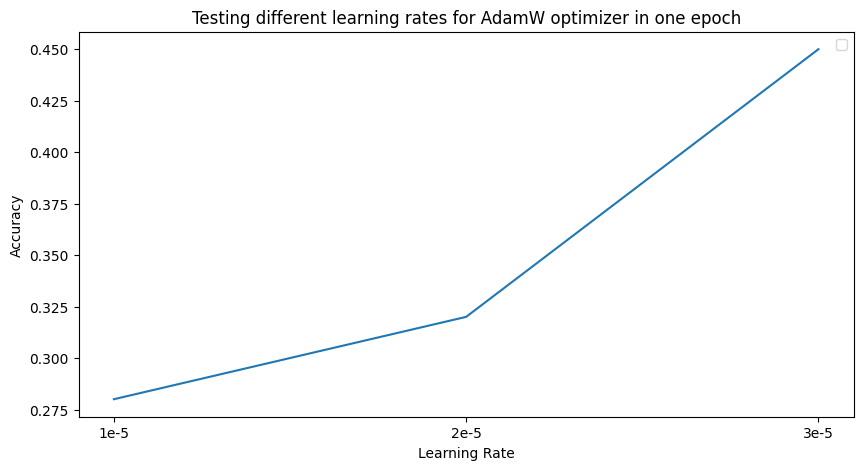

In [ ]:
"""
Testing different learning rates for AdamW optimizer in one epoch
The following values of learning rates were tested on this code
Recommanded learning rate for BERT between 2e-5 and 5e-5
"""
learning_rate = ['1e-5','2e-5','3e-5']
accuracy = [0.28,0.32,0.45]
plt.figure(figsize=(10,5))
plt.title('Testing different learning rates for AdamW optimizer in one epoch')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend()
plt.plot(learning_rate,accuracy)

In [ ]:
#creating an AdamW optimizer
optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)
#recommanded epsilon : 1e-8

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#Defining the number of epochs
epochs = 10

In [ ]:
#creating a scheduler to update the learning rate while training
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0.1,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#Defining the global accuracy function
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
#Defining the accuracy per class function
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_rep.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
    return preds_flat, labels_flat

In [ ]:
#Defining the device on which we're going to run the code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cpu


In [ ]:
#Defining the evaluation function to get predictions and true types
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
#Training

import random
seed_value = 17
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
f1_score_history = []
f1_score_train_history = []
train_loss_history = []
train_test_history = []

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_test)
    tr_loss, predictions_train, true_vals_train = evaluate(dataloader_train)
    val_f1 = f1_score_func(predictions, true_vals)
    tr_f1 = f1_score_func(predictions_train, true_vals_train)
    f1_score_history.append(val_f1)
    f1_score_train_history.append(tr_f1)
    tqdm.write(f'Test loss: {val_loss}')
    train_test_history.append(val_loss)
    tqdm.write(f'F1 Score test (Weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/231 [00:00<?, ?it/s]

In [ ]:
#Plotting the training and test accuracy per epoch

plt.figure(figsize=(15,10))
plt.plot(range(1,epochs+1),f1_score_train_history,label='Training loss')
plt.plot(range(1,epochs+1),f1_score_history,label='Test loss')
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


In [ ]:
#creating a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_rep),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

In [ ]:
#Loading the model we saved in a file
modelToBeUsed = '/content/drive/MyDrive/Capston/TEST/finetuned_BERT_epoch_7.model'
model.load_state_dict(torch.load(modelToBeUsed, map_location=torch.device('cuda')))

In [ ]:
#Getting the predictions and the types of the users in the test set
_, predictions, true_vals = evaluate(dataloader_test)

In [ ]:
#Getting the accuracy per class of each personality type
y_preds, y_true = accuracy_per_class(predictions, true_vals)

In [ ]:
#Plotting the confusion matrix in order to identifiy the misclassified types
from sklearn import metrics
import seaborn as sns
def show_confusion_matrix(confusion_matrix):
  plt.figure(figsize=(15,10))
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Type')
  plt.xlabel('Predicted Type');

cm = metrics.confusion_matrix(y_true, y_preds)
df_cm = pd.DataFrame(cm, index=labels2, columns=labels2)
show_confusion_matrix(df_cm)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_true, y_preds)

print(f"Accuracy: {accuracy:.2f}")

In [ ]:
"""
In the next step, we're going to try to understand the reason why certain personality types are being misclassified.
We're gonna use INFP and INFJ personality types as an example.
We're going to identify the vocabulary used in commun between these two types and calculate its percentage
"""
infj = df[df.types=='INFJ'].posts.values

In [ ]:
infp = df[df.types=='INFP'].posts.values

intj = df[df.types=='INTJ'].posts.values

entp = df[df.types=='ENTP'].posts.values

In [ ]:
infj = df[df.types=='INFJ'].posts.values


In [ ]:
infj_tokens = []
for post in infj:
  tokens = tokenizer.tokenize(post)
  infj_tokens = infj_tokens + tokens
infj_tokens = list(set(infj_tokens))
len(infj_tokens)

In [ ]:
print(infj_tokens)

In [ ]:
infp_tokens = []
for post in infp:
  tokens = tokenizer.tokenize(post)
  infp_tokens = infp_tokens + tokens
infp_tokens = list(set(infp_tokens))
len(infp_tokens)

In [ ]:
print(infp_tokens)

In [ ]:
entp_tokens = []
for post in entp:
  tokens = tokenizer.tokenize(post)
  entp_tokens = entp_tokens + tokens
entp_tokens = list(set(entp_tokens))
len(entp_tokens)

In [ ]:
pip install matplotlib wordcloud


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your code for tokenization here...

# Join the tokens into a single string
text = " ".join(entp_tokens)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for entp_tokens')
plt.show()


In [ ]:
print(entp_tokens)

In [ ]:
intj_tokens = []
for post in intj:
  tokens = tokenizer.tokenize(post)
  intj_tokens = intj_tokens + tokens
intj_tokens = list(set(intj_tokens))
len(intj_tokens)

In [ ]:
print(intj_tokens)

In [ ]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [ ]:
def intersection(lst4, lst5):
    lst6 = [value for value in lst4 if value in lst5]
    return lst6

In [ ]:
inter = intersection(infj_tokens,infp_tokens)


In [ ]:
inter1= intersection(intj_tokens,entp_tokens)

In [ ]:
len(inter)/len(infp_tokens)*100

In [ ]:
len(inter)/len(infj_tokens)*100

In [ ]:
len(inter1)/len(intj_tokens)*100

In [ ]:
len(inter1)/len(entp_tokens)*100

In [ ]:
#Identifying the missclassifications in each personaity trait
def translate(list1 , list2):
  lst=[]
  for x in list1:
    if x in list2:
      lst.append(0)
    else:
      lst.append(1)
  return(lst)
y_true_ie=translate(y_true,[0,6,3,2,10,8,11,9])
y_preds_ie=translate(y_preds,[0,6,3,2,10,8,11,9])

y_true_sn=translate(y_true,[15,13,14,12,10,8,11,9])
y_preds_sn=translate(y_preds,[15,13,14,12,10,8,11,9])

y_true_tf=translate(y_true,[4,1,14,12,3,2,11,9])
y_preds_tf=translate(y_preds,[4,1,14,12,3,2,11,9])

y_true_jp=translate(y_true,[5,4,15,14,0,3,10,11])
y_preds_jp=translate(y_preds,[5,4,15,14,0,3,10,11])

In [ ]:
#Plotting the confusion matrix for Introverts vs Extroverts
cm = metrics.confusion_matrix(y_true_ie, y_preds_ie)
df_cm = pd.DataFrame(cm, index=['Introvert','Extrovert'], columns=['Introvert','Extrovert'])
show_confusion_matrix(df_cm)

In [ ]:
#Plotting the confusion matrix for Sensing vs Intuitive
cm = metrics.confusion_matrix(y_true_sn, y_preds_sn)
df_cm = pd.DataFrame(cm, index=['Sensing','Intuition'], columns=['Sensing','Intuition'])
show_confusion_matrix(df_cm)

In [ ]:
#Plotting the confusion matrix for Thinking vs Feeling
cm = metrics.confusion_matrix(y_true_tf, y_preds_tf)
df_cm = pd.DataFrame(cm, index=['Thinking','Feeling'], columns=['Thinking','Feeling'])
show_confusion_matrix(df_cm)

In [ ]:
#Plotting the confusion matrix for Judging vs Perceiving
cm = metrics.confusion_matrix(y_true_jp, y_preds_jp)
df_cm = pd.DataFrame(cm, index=['Judging','Perceiving'], columns=['Judging','Perceiving'])
show_confusion_matrix(df_cm)


In [ ]:
#Loading the Dataset
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Capston/mbti_1.csv')

In [ ]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

import re
def clean_text(string):
  clean=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ',string) #remove url
  clean=re.sub('[\n]',' ',clean) #remove newline character
  clean=re.sub('[^a-zA-Z]',' ',clean.lower()) #remove non alphabetic characters
  clean=mystopwords(clean) #remove stopwords
  return clean

In [ ]:
df.head(5)

In [ ]:
#Cleaning the data
data=[]
for i in range(len(df)):
  l=[]
  l.append(df['types'][i])
  l.append(clean_text(df['posts'][i]))
  data.append(l)

In [ ]:
#Suffling the data and splitting the data into train and test sets (90:10)
import random
suffled_set=random.sample(data,len(data))
train_len=int(len(suffled_set)*0.9)
train=suffled_set[:train_len]
test=suffled_set[train_len:]

In [ ]:
#Data Summary
print('Length of the Data: ',len(df))
print('No. of Training Examples: ',len(train))
print('No. of Test Examples: ',len(test))
print('No. of Classes: ',df['types'].nunique())

In [ ]:
#Separating the personality types (labels) and the posts
train_sentences=[]
test_sentences=[]
train_labels=[]
test_labels=[]
labels=[]
sentences=[]

for i in range(len(train)):
  train_labels.append(train[i][0])
  train_sentences.append(train[i][1])

for i in range(len(test)):
  test_labels.append(test[i][0])
  test_sentences.append(test[i][1])

for i in range(len(suffled_set)):
  labels.append(suffled_set[i][0])
  sentences.append(suffled_set[i][1])

In [ ]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

embedding_dim = 300
max_length = 900
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=19999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:

#Label Encoding the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels=le.transform(train_labels)
le.fit(test_labels)
test_labels=le.transform(test_labels)
le.fit(labels)
labels=le.transform(labels)

train_labels=np.expand_dims(train_labels, axis=1)
test_labels=np.expand_dims(test_labels, axis=1)
labels=np.expand_dims(labels, axis=1)


In [ ]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Test Data: ',test_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Test Labels: ',test_labels.shape)
print('Dimension of Data: ',padded.shape)
print('Dimension of Labels: ',labels.shape)

**Convolutional Neural Network (CNN)**

In [ ]:
#from keras.regularizers import l2
#Building the CNN Model
model_conv = tf.keras.Sequential([
    #tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [ ]:
model_conv.summary()

In [ ]:
model_conv.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history=model_conv.fit(train_padded, train_labels, epochs=num_epochs, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined and trained your model with 'history'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)  # Adjust the range for x-axis


In [ ]:

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
score, acc = model_conv.evaluate(test_padded, test_labels, verbose=2)
print('Test accuracy:', acc)

In [ ]:
pred_prob_test_labels=model_conv.predict(test_padded)

pred_test_labels=[]
for i in range(len(pred_prob_test_labels)):
  pred_test_labels.append(np.argmax(pred_prob_test_labels[i]))

In [ ]:
pred_test_labels=np.array(pred_test_labels)
true_test_labels=np.squeeze(test_labels, axis=1)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(true_test_labels, pred_test_labels)
print('Cohen Score: ',cohen_score)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)"""

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(true_test_labels, pred_test_labels, classes=df['types'].unique(),
                      title='Confusion Matrix')


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define your true and predicted labels, and class names
true_test_labels = [1, 2, 3, 1, 2, 3, 1, 2, 3]  # Replace with your actual data
pred_test_labels = [1, 2, 2, 1, 2, 3, 1, 2, 2]  # Replace with your actual predictions
class_names = ['true_test_labels', 'pred_test_labels', 'class_names']  # Replace with your actual class names

# Call the plot_confusion_matrix function
plot_confusion_matrix(true_test_labels, pred_test_labels, classes=class_names,
                      title='Confusion Matrix')

plt.show()


**Multinomial Naive Bayes Classifier**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated 'x' and 'y'
x = df['types'].unique()
y = df['types'].value_counts()

# Define a colormap for colorful bars
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))  # You can choose a different colormap if desired

plt.figure(figsize=(10, 6))

# Create colorful bars using the defined colormap
bars = plt.bar(x, y, width=0.8, align='center', color=colors)
plt.xticks(rotation=45)
plt.xlabel('Personality Types')
plt.ylabel('Number of Persons')
plt.title('Personality Types Distribution')

# Add color labels to the legend
color_labels = [f"{x_val}: {y_val}" for x_val, y_val in zip(x, y)]
plt.legend(bars, color_labels, title='Counts', loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                   ])


In [ ]:
pipeline.fit(train_sentences,train_labels)

In [ ]:
pred=pipeline.predict(test_sentences)

In [ ]:
from sklearn.metrics import accuracy_score
print('Test Accuracy using MultiNomial Naive Bayes Classifier: ',accuracy_score(test_labels,pred))

**Support Vector Machines**

In [ ]:
from sklearn.svm import SVC
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',SVC())
                   ])


In [ ]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(test_sentences)


In [ ]:
from sklearn.metrics import accuracy_score
print('Test Accuracy using Support Vector Machines: ',accuracy_score(test_labels,pred))

**Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline=Pipeline([('bow',CountVectorizer(analyzer=clean_text)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',RandomForestClassifier(n_estimators=600))
                   ])

In [ ]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(test_sentences)


In [ ]:
from sklearn.metrics import accuracy_score
print('Test Accuracy using Random Forest Classifier: ',accuracy_score(test_labels,pred))